In [ ]:
import pandas as pd
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score,confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
import matplotlib.pyplot as plt

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

df = pd.read_csv('/content/gdrive/My Drive/magic/magic04.data', names = col_names)

In [ ]:
g = df.loc[df['class'] == 'g']
h = df.loc[df['class'] == 'h']

In [ ]:
df.shape

(19020, 11)

In [ ]:
g.shape

(12332, 11)

In [ ]:
h.shape

(6688, 11)

In [ ]:
np.random.seed(10)

remove_n = g.shape[0] - h.shape[0]

drop_indices = np.random.choice(g.index, remove_n, replace=False)
g_subset = g.loc[drop_indices, :]
df = df.drop(drop_indices)

In [ ]:
g.shape

(12332, 11)

In [ ]:
h.shape

(6688, 11)

In [ ]:
df.shape

(13376, 11)

In [ ]:
gg = df.loc[df['class'] == 'g']
hh = df.loc[df['class'] == 'h']

In [ ]:
gg.shape , hh.shape

((6688, 11), (6688, 11))

In [ ]:
x_before_spliting = df[col_names[:-1]]
y_before_spliting = df['class']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_before_spliting, y_before_spliting, train_size=0.7)

In [ ]:
X_train.shape, X_test.shape

((9363, 10), (4013, 10))

In [ ]:
Y_train.shape, Y_test.shape

((9363,), (4013,))

In [ ]:
def knn():
    k_score =[]
    for i in range(1,100,1):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,Y_train)
        pred = knn.predict(X_train)
        score = accuracy_score(Y_train,pred)
        k_score.append((i, score))
    k = max(k_score,key=lambda x:x[1])[0]  #get best K (hyperparameter Tuning)
    knn = KNeighborsClassifier(n_neighbors=k)
    return knn

In [ ]:
def rand_forest():
    tuning_param =[]  # to be used in tuning n_estimators
    for i in ['gini','entropy']:
        for j in range(1,100,1):
            forest = RandomForestClassifier(n_estimators=j, max_depth=2,random_state=0,criterion=i)
            forest.fit(X_train,Y_train)
            pred = forest.predict(X_train)
            score = accuracy_score(Y_train,pred)
            tuning_param.append((i,j,score))
    heighest = max(tuning_param,key=lambda x:x[2])  #returns forest with highest n_estimator param
    forest = RandomForestClassifier(n_estimators=heighest[1], max_depth=2,random_state=0,criterion=heighest[0]) 
    return forest

In [ ]:
def ada_boost():
    tuning_param = []
    for i in range(1,100,1):
        clf = AdaBoostClassifier(n_estimators=i, random_state=0)
        clf.fit(X_train,Y_train)
        pred = clf.predict(X_train)
        score = accuracy_score(Y_train,pred)
        tuning_param.append((i,score))

    clf = AdaBoostClassifier(n_estimators=max(tuning_param,key=lambda x:x[1])[0], random_state=0)
    return clf

In [ ]:
def dec_tree():
    tree = DecisionTreeClassifier(criterion='entropy')
    tree.fit(X_train,Y_train)

    return tree

In [ ]:
def naive_bayes():
  N = GaussianNB()
  N.fit(X_train,Y_train)

  return N

In [ ]:


def plot_cm(cm,counter,name):

  group_names = ["True Gamma","False Hadron","False Gamma","True Hadron"]  # labels like TN FP FN TP
  group_counts = ["{0:0.0f}".format(value) for value in     #value
                cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in   #percentages
                     cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)


  plt.subplot(3,2,counter)
  plt.title(name)
  sn.heatmap(cm/np.sum(cm),annot = labels,fmt='',annot_kws={"size": 16}) #heatmap with our confusion matrix
  
  

  

In [ ]:
Classifiers = {"Naive Bayes":naive_bayes,"KNN": knn, "Random Forest": rand_forest, "Ada Boost": ada_boost,
 "Decision Tree": dec_tree
}

Classifier:  Naive Bayes
Number of Mislabeled Points = 1395 Out of 4013 Total Points.
Precision:  0.700 	 Recall:  0.650 	 FMeasure:  0.628
Model Accuracy = 0.652 



Classifier:  KNN
Number of Mislabeled Points = 1019 Out of 4013 Total Points.
Precision:  0.748 	 Recall:  0.746 	 FMeasure:  0.745
Model Accuracy = 0.746 



Classifier:  Random Forest
Number of Mislabeled Points = 968 Out of 4013 Total Points.
Precision:  0.760 	 Recall:  0.759 	 FMeasure:  0.759
Model Accuracy = 0.759 



Classifier:  Ada Boost
Number of Mislabeled Points = 685 Out of 4013 Total Points.
Precision:  0.829 	 Recall:  0.829 	 FMeasure:  0.829
Model Accuracy = 0.829 



Classifier:  Decision Tree
Number of Mislabeled Points = 820 Out of 4013 Total Points.
Precision:  0.796 	 Recall:  0.795 	 FMeasure:  0.795
Model Accuracy = 0.796 





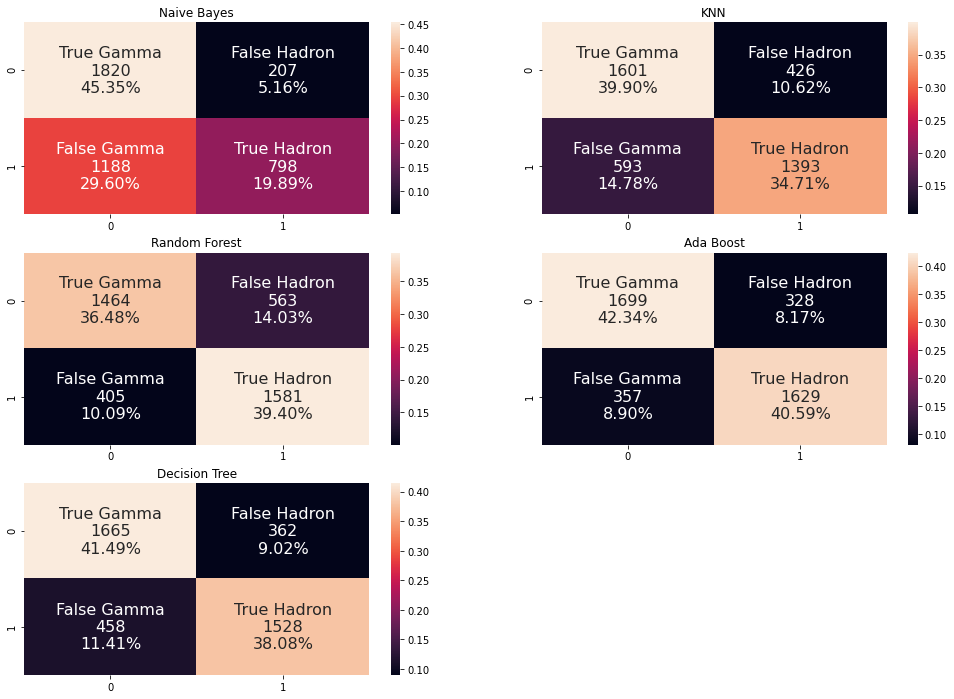

In [ ]:
fig = plt.figure(figsize=(17,12))
counter = 0
for name in Classifiers: #iterate over each model
    model = Classifiers[name]() 
    y_pred = model.fit(X_train,Y_train).predict(X_test) #predict X_test
    
    counter = counter + 1
    print("Classifier: ", name)
    
    print("Number of Mislabeled Points = %d Out of %d Total Points."% ((Y_test != y_pred).sum(), X_test.shape[0])) #get mislabeled points
    
    r = precision_recall_fscore_support(Y_test, y_pred) #recall,presicion, FMeasure

    print("Precision: ","{:.3f}".format(  (r[0][0]+r[0][1])/2 ), "\t Recall: ","{:.3f}".format( (r[1][0]+r[1][1])/2 ),
          "\t FMeasure: ","{:.3f}".format(( (r[2][0]+r[2][1])/2 )))
    
    print("Model Accuracy =" , "{:.3f}".format( model.score(X_test,Y_test)),"\n\n\n" )  #Accuracy
    cm = confusion_matrix(Y_test,y_pred) #Confusion Matrix
    plot_cm(cm,counter,name)
    
    
   
    
    
   

    print("=======================================")

plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(Y_train)                                 #encode y_test and y_train 
encoded_Y_train = encoder.transform(Y_train)         #and turn to categorical
dummy_yTrain = to_categorical(encoded_Y_train)


encoder.fit(Y_test)
encoded_Y_test = encoder.transform(Y_test)
dummy_yTest = to_categorical(encoded_Y_test)


model = Sequential()
model.add(Dense(8,activation='relu',input_dim=10))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


history = model.fit(X_train, dummy_yTrain, validation_split=0.3, epochs=100, batch_size=5, verbose=0)

y_pred = model.predict(X_test)

Keras 2 Layer Dense Neural Network
Number of Mislabeled Points = 865 Out of 4013 Total Points.
Precision:  0.785 	 Recall:  0.785 	 FMeasure:  0.784
Model Accuracy = 0.784


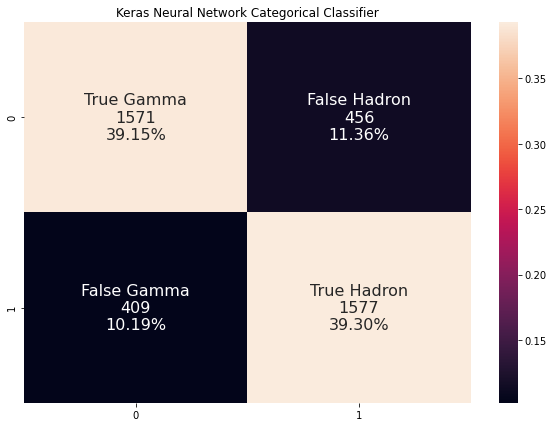

In [ ]:
y_pred_e = [np.argmax(y, axis=None, out=None) for y in y_pred] #return to original shape
y_pred_new = encoder.inverse_transform(y_pred_e)
#print(y_pred_new.shape)

print("Keras 2 Layer Dense Neural Network")
print("Number of Mislabeled Points = %d Out of %d Total Points."% ((Y_test != y_pred_new).sum(), X_test.shape[0])) #get mislabeled points
r = precision_recall_fscore_support(Y_test, y_pred_new) #recall , prescision, fmeasure

print("Precision: ","{:.3f}".format(  (r[0][0]+r[0][1])/2 ), "\t Recall: ","{:.3f}".format( (r[1][0]+r[1][1])/2 ),
      "\t FMeasure: ","{:.3f}".format(( (r[2][0]+r[2][1])/2 )))


print("Model Accuracy =" , "{:.3f}".format( model.evaluate(X_test,dummy_yTest,verbose=0)[1]) )  #accuracy

cm = confusion_matrix(Y_test, y_pred_new) #get confusion matrix

figure = plt.figure(figsize=(10,7))

group_names = ["True Gamma","False Hadron","False Gamma","True Hadron"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


  
plt.title("Keras Neural Network Categorical Classifier")
sn.heatmap(cm/np.sum(cm),annot = labels,fmt='',annot_kws={"size": 16})
plt.show()


